In [247]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [248]:
#글꼴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [249]:
from matplotlib import font_manager, rc
plt.rc('font', family='NanumBarunGothic')   

In [250]:
url = 'https://www.seoul.go.kr/main/corona_status.jsp'
pd.read_html(url)

[      강남구     강동구     강북구     강서구     관악구     광진구     구로구     금천구     노원구  \
 0  315903  283400  167004  356449  307946  213585  247708  140037  313372   
 1    +264    +264    +156    +346    +272    +190    +263    +138    +264   
 2    서대문구     서초구     성동구     성북구     송파구     양천구    영등포구     용산구     은평구   
 3  188232  243336  176336  263090  405933  269088  249969  127651  281685   
 4    +189    +202    +170    +259    +412    +197    +239    +119    +339   
 
       도봉구    동대문구     동작구     마포구  
 0  180819  206638  243751  230741  
 1    +191    +273    +204    +204  
 2     종로구      중구     중랑구      기타  
 3   83071   74856  226910  406767  
 4     +86     +79    +202    +465  ,
        강남구     강동구     강북구     강서구     관악구     광진구
 0   315903  283400  167004  356449  307946  213585
 1     +264    +264    +156    +346    +272    +190
 2      구로구     금천구     노원구     도봉구    동대문구     동작구
 3   247708  140037  313372  180819  206638  243751
 4     +263    +138    +264    +191    +273    

In [251]:
table = pd.read_html(url)

len(table)
#각 테이블 수

2

In [252]:
#데이터 csv초기화
df_raw = table[0].T.reset_index()
df_raw

,index,0,1,2,3,4
0,강남구,315903,+264,서대문구,188232,+189
1,강동구,283400,+264,서초구,243336,+202
2,강북구,167004,+156,성동구,176336,+170
3,강서구,356449,+346,성북구,263090,+259
4,관악구,307946,+272,송파구,405933,+412
5,광진구,213585,+190,양천구,269088,+197
6,구로구,247708,+263,영등포구,249969,+239
7,금천구,140037,+138,용산구,127651,+119
8,노원구,313372,+264,은평구,281685,+339
9,도봉구,180819,+191,종로구,83071,+86


In [253]:
idx = pd.IndexSlice
df_slice_1 = df_raw.loc[:,2:4]
df_slice_1

,2,3,4
0,서대문구,188232,+189
1,서초구,243336,+202
2,성동구,176336,+170
3,성북구,263090,+259
4,송파구,405933,+412
5,양천구,269088,+197
6,영등포구,249969,+239
7,용산구,127651,+119
8,은평구,281685,+339
9,종로구,83071,+86


In [254]:
idx = pd.IndexSlice
df_slice_2 = df_raw.loc[:,"index":1]
df_slice_2


,index,0,1
0,강남구,315903,+264
1,강동구,283400,+264
2,강북구,167004,+156
3,강서구,356449,+346
4,관악구,307946,+272
5,광진구,213585,+190
6,구로구,247708,+263
7,금천구,140037,+138
8,노원구,313372,+264
9,도봉구,180819,+191


In [255]:
df_slice_1.columns =["시군구", "총_확진자", "확진자"]
df_slice_1 

,시군구,총_확진자,확진자
0,서대문구,188232,+189
1,서초구,243336,+202
2,성동구,176336,+170
3,성북구,263090,+259
4,송파구,405933,+412
5,양천구,269088,+197
6,영등포구,249969,+239
7,용산구,127651,+119
8,은평구,281685,+339
9,종로구,83071,+86


In [256]:
df_slice_2.columns = ["시군구", "총_확진자", "확진자"]

In [257]:
df_slice_2

,시군구,총_확진자,확진자
0,강남구,315903,+264
1,강동구,283400,+264
2,강북구,167004,+156
3,강서구,356449,+346
4,관악구,307946,+272
5,광진구,213585,+190
6,구로구,247708,+263
7,금천구,140037,+138
8,노원구,313372,+264
9,도봉구,180819,+191


In [258]:
df = pd.concat([df_slice_2,df_slice_1], axis =0)
df

,시군구,총_확진자,확진자
0,강남구,315903,+264
1,강동구,283400,+264
2,강북구,167004,+156
3,강서구,356449,+346
4,관악구,307946,+272
5,광진구,213585,+190
6,구로구,247708,+263
7,금천구,140037,+138
8,노원구,313372,+264
9,도봉구,180819,+191


In [259]:
df

,시군구,총_확진자,확진자
0,강남구,315903,+264
1,강동구,283400,+264
2,강북구,167004,+156
3,강서구,356449,+346
4,관악구,307946,+272
5,광진구,213585,+190
6,구로구,247708,+263
7,금천구,140037,+138
8,노원구,313372,+264
9,도봉구,180819,+191


In [260]:
df.reset_index(drop=True)

,시군구,총_확진자,확진자
0,강남구,315903,+264
1,강동구,283400,+264
2,강북구,167004,+156
3,강서구,356449,+346
4,관악구,307946,+272
5,광진구,213585,+190
6,구로구,247708,+263
7,금천구,140037,+138
8,노원구,313372,+264
9,도봉구,180819,+191


In [261]:
df["확진자"] = df["확진자"].str.strip('+')
df

,시군구,총_확진자,확진자
0,강남구,315903,264
1,강동구,283400,264
2,강북구,167004,156
3,강서구,356449,346
4,관악구,307946,272
5,광진구,213585,190
6,구로구,247708,263
7,금천구,140037,138
8,노원구,313372,264
9,도봉구,180819,191


In [278]:
df_corona_seoul = df.drop('확진자', axis=1)

In [279]:
df_corona_seoul

,시군구,총_확진자
0,강남구,315903
1,강동구,283400
2,강북구,167004
3,강서구,356449
4,관악구,307946
5,광진구,213585
6,구로구,247708
7,금천구,140037
8,노원구,313372
9,도봉구,180819


In [280]:
df_corona_seoul['총_확진자'] = df_corona_seoul['총_확진자'].astype('int')
#df_corona_seoul['총_확진자'] = df_corona_seoul['총_확진자'].sort_values()

In [269]:
df['확진자'] = pd.to_numeric(df['확진자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구     26 non-null     object
 1   총_확진자   26 non-null     object
 2   확진자     26 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 832.0+ bytes


In [ ]:
df = df.sort_values(by='확진자')
df

,시군구,총_확진자,확진자
10,중구,74856,79
9,종로구,83071,86
7,용산구,127651,119
7,금천구,140037,138
2,강북구,167004,156
2,성동구,176336,170
0,서대문구,188232,189
5,광진구,213585,190
9,도봉구,180819,191
5,양천구,269088,197


In [ ]:
df = df.reset_index(drop=True)
df

,시군구,총_확진자,확진자
0,중구,74856,79
1,종로구,83071,86
2,용산구,127651,119
3,금천구,140037,138
4,강북구,167004,156
5,성동구,176336,170
6,서대문구,188232,189
7,광진구,213585,190
8,도봉구,180819,191
9,양천구,269088,197


In [271]:
df_corona_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구     26 non-null     object
 1   총_확진자   26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [272]:
df_corona_seoul = df_corona_seoul.drop(df_corona_seoul.index[25], inplace=True)
df_corona_seoul

Text(0.5, 1.0, '서울시 구별 코로나 확진자수 총계')

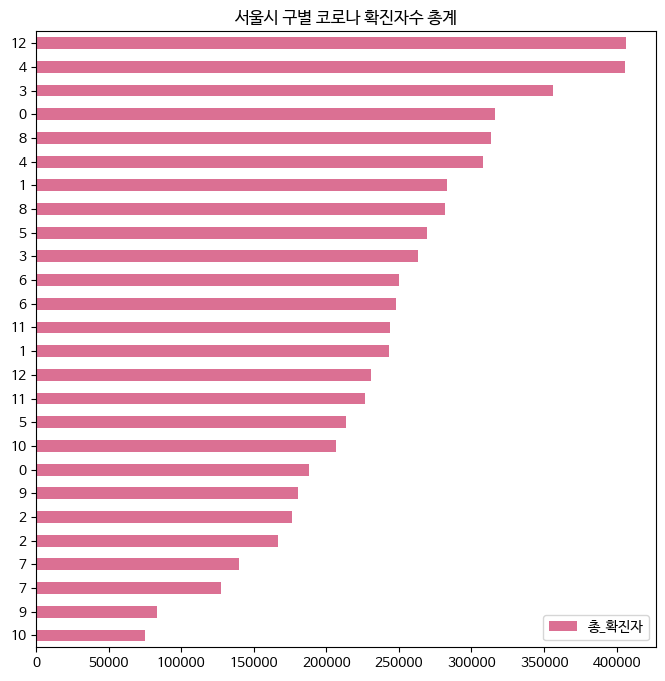

In [282]:
#내림차순 정렬한 데이터를 그래프로 표기
df_corona_seoul.sort_values(by='총_확진자').plot.barh(color='palevioletred',figsize=(8,8))
plt.title('서울시 구별 코로나 확진자수 총계')

In [ ]:
plt.bar


AttributeError: ignored

In [285]:
df_corona_seoul= df_corona_seoul.sort_values(by='시군구')
df_corona_seoul

,시군구,총_확진자
0,강남구,315903
1,강동구,283400
2,강북구,167004
3,강서구,356449
4,관악구,307946
5,광진구,213585
6,구로구,247708
7,금천구,140037
12,기타,406767
8,노원구,313372


In [ ]:
df_corona_seoul = df_corona_seoul.reset_index(drop=True)

In [ ]:
df_corona_seoul = df_corona_seoul.drop('기타',axis=0)

In [290]:
Trash = pd.read_csv('./drive/MyDrive/df_garbage_seoul.csv', encoding='cp949')
Trash

,시군구명,배출량
0,송파구,38265512065
1,도봉구,34790954457
2,노원구,32942231384
3,마포구,20825545358
4,영등포구,18647711639
5,강동구,14253903549
6,양천구,12177225579
7,중랑구,11582342110
8,동작구,11450788663
9,서대문구,11004141699


In [292]:
Trash.columns = ['시군구', '배출량']
Trash

,시군구,배출량
0,송파구,38265512065
1,도봉구,34790954457
2,노원구,32942231384
3,마포구,20825545358
4,영등포구,18647711639
5,강동구,14253903549
6,양천구,12177225579
7,중랑구,11582342110
8,동작구,11450788663
9,서대문구,11004141699


In [293]:
Trash = Trash.sort_values(by='시군구')
Trash


,시군구,배출량
22,강남구,1418405631
5,강동구,14253903549
23,강북구,1385646550
13,강서구,7844540723
17,관악구,4566695953
16,광진구,5490445600
20,구로구,3732283305
14,금천구,7115182020
2,노원구,32942231384
1,도봉구,34790954457


In [302]:
df = pd.merge(df_corona_seoul, Trash)

In [303]:
df

,시군구,총_확진자,배출량
0,강남구,315903,1418405631
1,강동구,283400,14253903549
2,강북구,167004,1385646550
3,강서구,356449,7844540723
4,관악구,307946,4566695953
5,광진구,213585,5490445600
6,구로구,247708,3732283305
7,금천구,140037,7115182020
8,노원구,313372,32942231384
9,도봉구,180819,34790954457


In [297]:
# 앞에서 처리한 서울시 구별 음식점 수 csv 데이터 로딩
df_food_seoul = pd.read_csv('/content/drive/MyDrive/df_food_seoul.csv', encoding='cp949')
df_food_seoul

,시군구명,음식점수
0,강남구,12723
1,마포구,7684
2,송파구,7348
3,서초구,6610
4,강서구,6393
5,영등포구,6389
6,관악구,5387
7,강동구,5181
8,종로구,5158
9,중구,4869


In [300]:
df_food_seoul.columns = ['시군구', '음식점수']
df_food_seoul

,시군구,음식점수
0,강남구,12723
1,마포구,7684
2,송파구,7348
3,서초구,6610
4,강서구,6393
5,영등포구,6389
6,관악구,5387
7,강동구,5181
8,종로구,5158
9,중구,4869


In [301]:
df_food_seoul = df_food_seoul.sort_values(by='시군구')
df_food_seoul

,시군구,음식점수
0,강남구,12723
7,강동구,5181
22,강북구,3289
4,강서구,6393
6,관악구,5387
13,광진구,4569
10,구로구,4615
23,금천구,3195
17,노원구,4047
24,도봉구,2690


In [319]:
total = pd.merge(df, df_food_seoul)

In [320]:
total

,시군구,총_확진자,배출량,음식점수
0,강남구,315903,1418405631,12723
1,강동구,283400,14253903549,5181
2,강북구,167004,1385646550,3289
3,강서구,356449,7844540723,6393
4,관악구,307946,4566695953,5387
5,광진구,213585,5490445600,4569
6,구로구,247708,3732283305,4615
7,금천구,140037,7115182020,3195
8,노원구,313372,32942231384,4047
9,도봉구,180819,34790954457,2690


In [321]:
total.columns.tolist()

['시군구', '총_확진자', '배출량', '음식점수']

In [322]:
total = total[['시군구','음식점수','총_확진자', '배출량' ]]

In [323]:
total

,시군구,음식점수,총_확진자,배출량
0,강남구,12723,315903,1418405631
1,강동구,5181,283400,14253903549
2,강북구,3289,167004,1385646550
3,강서구,6393,356449,7844540723
4,관악구,5387,307946,4566695953
5,광진구,4569,213585,5490445600
6,구로구,4615,247708,3732283305
7,금천구,3195,140037,7115182020
8,노원구,4047,313372,32942231384
9,도봉구,2690,180819,34790954457


In [324]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구     25 non-null     object
 1   음식점수    25 non-null     int64 
 2   총_확진자   25 non-null     int64 
 3   배출량     25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1000.0+ bytes


Text(0.5, 1.0, '구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

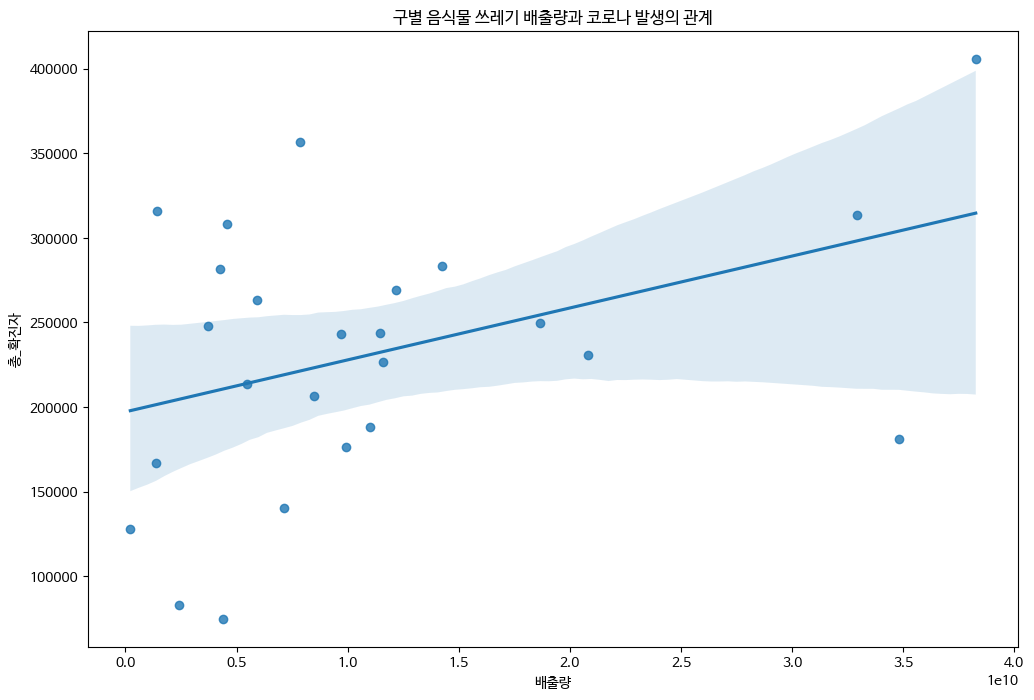

In [326]:
plt.figure(figsize = (12,8))
sns.regplot(x='배출량', y='총_확진자', data=total)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

Text(0.5, 1.0, '구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

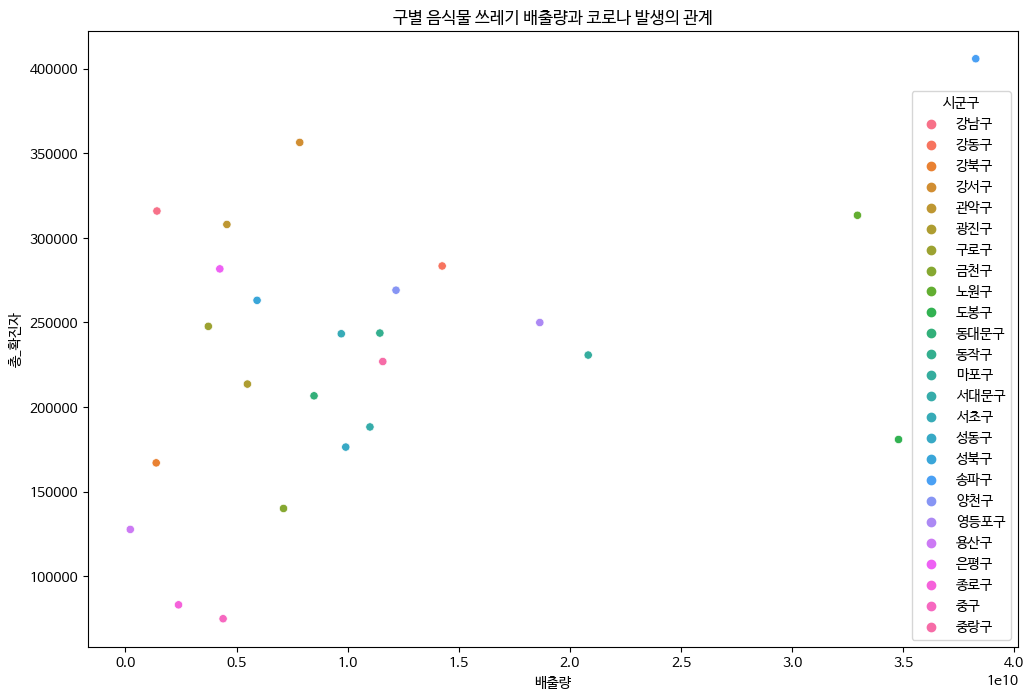

In [328]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='배출량', y='총_확진자', hue='시군구', data=total)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

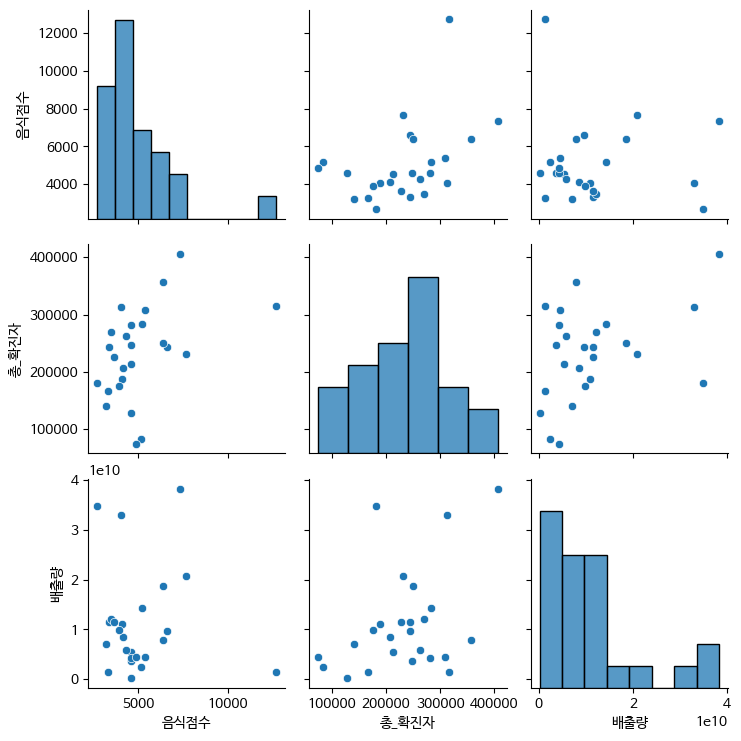

In [365]:
sns.pairplot(total)
plt.show()

In [345]:
pd.unique(total['총_확진자'])

array([315903, 283400, 167004, 356449, 307946, 213585, 247708, 140037,
       313372, 180819, 206638, 243751, 230741, 188232, 243336, 176336,
       263090, 405933, 269088, 249969, 127651, 281685,  83071,  74856,
       226910])

In [360]:
input_data = total[['배출량']].to_numpy()

In [361]:
target_data = total['총_확진자'].to_numpy()

In [362]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, random_state=42)

In [363]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(input_data)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [366]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(input_data)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.3888888888888889
0.0


In [370]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [516]:
Air = pd.read_excel('./drive/MyDrive/CO2.xlsx')
Air

,행정구역분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
0,서울특별시,22868,2721,9121,516,66145,63368,3057,42125,968
1,부산광역시,16726,2436,6636,3481,43099,33447,1462,22210,424
2,대구광역시,8773,1038,3063,1971,21344,29980,1458,13535,247
3,인천광역시,20153,2330,6772,7821,44557,49131,5383,32136,511
4,광주광역시,5230,541,1764,114,11060,16256,784,7040,153
5,대전광역시,4551,499,1453,175,12302,14826,670,7899,148
6,울산광역시,7350,1879,3213,36969,42615,82245,13569,27507,250
7,세종특별자치시,2405,302,887,59,4498,5590,2814,4357,97
8,경기도,78620,8991,28076,5956,151754,184105,37941,109728,2516
9,강원도,19656,3456,7946,10475,59267,26260,13017,41561,596


In [517]:
Air = Air.drop(["TSP",	"PM-2.5"	,"PM-10"	,"SOx"	,"NOx"	,"VOCs"	,"NH3"	,"BC"], axis=1)

In [391]:
Air

,행정구역분류,CO
0,서울특별시,42125
1,부산광역시,22210
2,대구광역시,13535
3,인천광역시,32136
4,광주광역시,7040
5,대전광역시,7899
6,울산광역시,27507
7,세종특별자치시,4357
8,경기도,109728
9,강원도,41561


In [395]:
Fire = pd.read_csv('./drive/MyDrive/Fire.csv', encoding='cp949')
Fire

,시도별(1),2020,2020.1,2020.2,2020.3
0,시도별(1),금년,금년,10년 평균,10년 평균
1,시도별(1),건수 (건),면적 (ha),건수 (건),면적 (ha)
2,계,620,2919.84,474.0,1119.48
3,서울,4,0.92,11.4,1.33
4,부산,16,0.62,12.5,23.76
5,대구,16,0.50,7.4,0.75
6,인천,14,12.12,17.7,4.41
7,광주,2,0.19,3.4,0.50
8,대전,3,0.33,7.4,2.08
9,울산,18,531.33,11.3,89.35


In [396]:
Fire.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
시도별(1),시도별(1),시도별(1),계,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2020,금년,건수 (건),620,4,16,16,14,2,3,18,4,213,74,13,35,23,36,106,41,2
2020.1,금년,면적 (ha),2919.84,0.92,0.62,0.50,12.12,0.19,0.33,531.33,0.49,53.02,220.48,3.97,4.27,2.95,8.19,2052.89,25.69,1.88
2020.2,10년 평균,건수 (건),474.0,11.4,12.5,7.4,17.7,3.4,7.4,11.3,3.2,95.0,71.0,24.2,26.2,21.6,40.1,79.2,41.6,0.5
2020.3,10년 평균,면적 (ha),1119.48,1.33,23.76,0.75,4.41,0.50,2.08,89.35,1.25,32.13,553.70,12.60,7.69,4.41,15.32,353.74,16.09,0.39


In [ ]:
Fire

In [427]:
#Fire.loc(['시도별(1)','2020'])

Air

,행정구역분류,CO
0,서울특별시,42125
1,부산광역시,22210
2,대구광역시,13535
3,인천광역시,32136
4,광주광역시,7040
5,대전광역시,7899
6,울산광역시,27507
7,세종특별자치시,4357
8,경기도,109728
9,강원도,41561


UFuncTypeError: ignored

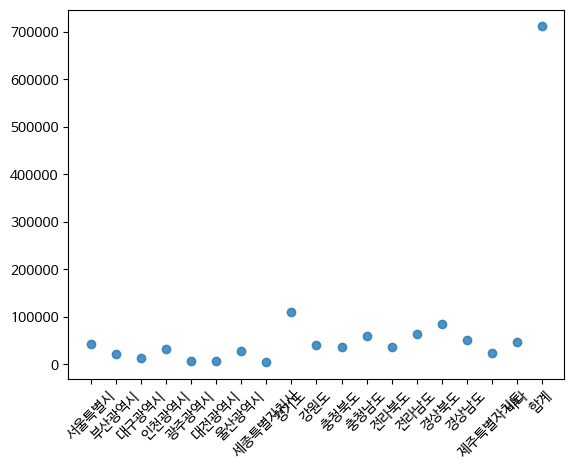

In [428]:
plt.xticks(rotation=45)
sns.regplot(x='행정구역분류', y='CO', data=Air)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

In [399]:
Air.columns.tolist()

['행정구역분류', 'CO']

In [402]:
Fire.columns.tolist()

['시도별(1)', '2020', '2020.1', '2020.2', '2020.3']

In [450]:
Fire.columns = [	'시도별(1)',	'건수 (건)',	'면적 (ha)',	'건수 (건)2',	'면적 (ha)2']
Fire

,시도별(1),건수 (건),면적 (ha),건수 (건)2,면적 (ha)2
0,계,620,2919.84,474.0,1119.48
1,서울,4,0.92,11.4,1.33
2,부산,16,0.62,12.5,23.76
3,대구,16,0.50,7.4,0.75
4,인천,14,12.12,17.7,4.41
5,광주,2,0.19,3.4,0.50
6,대전,3,0.33,7.4,2.08
7,울산,18,531.33,11.3,89.35
8,세종,4,0.49,3.2,1.25
9,경기,213,53.02,95.0,32.13


In [409]:
Fire = Fire.drop([0,1], axis=0)

In [410]:
Fire

,시도별(1),건수 (건),면적 (ha),건수 (건),면적 (ha)
2,계,620,2919.84,474.0,1119.48
3,서울,4,0.92,11.4,1.33
4,부산,16,0.62,12.5,23.76
5,대구,16,0.50,7.4,0.75
6,인천,14,12.12,17.7,4.41
7,광주,2,0.19,3.4,0.50
8,대전,3,0.33,7.4,2.08
9,울산,18,531.33,11.3,89.35
10,세종,4,0.49,3.2,1.25
11,경기,213,53.02,95.0,32.13


In [407]:
Fire.drop(1, axis=0)

,시도별(1),건수 (건),면적 (ha),건수 (건),면적 (ha)
0,시도별(1),금년,금년,10년 평균,10년 평균
2,계,620,2919.84,474.0,1119.48
3,서울,4,0.92,11.4,1.33
4,부산,16,0.62,12.5,23.76
5,대구,16,0.50,7.4,0.75
6,인천,14,12.12,17.7,4.41
7,광주,2,0.19,3.4,0.50
8,대전,3,0.33,7.4,2.08
9,울산,18,531.33,11.3,89.35
10,세종,4,0.49,3.2,1.25


In [411]:
Fire = Fire.reset_index(drop=True)

In [412]:
Fire

,시도별(1),건수 (건),면적 (ha),건수 (건),면적 (ha)
0,계,620,2919.84,474.0,1119.48
1,서울,4,0.92,11.4,1.33
2,부산,16,0.62,12.5,23.76
3,대구,16,0.50,7.4,0.75
4,인천,14,12.12,17.7,4.41
5,광주,2,0.19,3.4,0.50
6,대전,3,0.33,7.4,2.08
7,울산,18,531.33,11.3,89.35
8,세종,4,0.49,3.2,1.25
9,경기,213,53.02,95.0,32.13


In [471]:
Fire.columns.tolist()

['시도별(1)', '건수 (건)', '면적 (ha)', '건수 (건)2', '면적 (ha)2']

In [491]:
Fire2 = Fire.drop([ '건수 (건)', '면적 (ha)', '면적 (ha)'], axis=1)

In [492]:
Fire2 = Fire2.drop(0, axis=0)

In [493]:
Fire2

,시도별(1),건수 (건)2,면적 (ha)2
1,서울,11.4,1.33
2,부산,12.5,23.76
3,대구,7.4,0.75
4,인천,17.7,4.41
5,광주,3.4,0.50
6,대전,7.4,2.08
7,울산,11.3,89.35
8,세종,3.2,1.25
9,경기,95.0,32.13
10,강원,71.0,553.70


In [494]:
Fire2.columns = [	'시도별',	'건수', '면적']
Fire2

,시도별,건수,면적
1,서울,11.4,1.33
2,부산,12.5,23.76
3,대구,7.4,0.75
4,인천,17.7,4.41
5,광주,3.4,0.50
6,대전,7.4,2.08
7,울산,11.3,89.35
8,세종,3.2,1.25
9,경기,95.0,32.13
10,강원,71.0,553.70


In [453]:
Fire2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     18 non-null     object
 1   건수      18 non-null     object
 2   면적      18 non-null     object
dtypes: object(3)
memory usage: 560.0+ bytes


In [496]:
Fire2['건수'] = Fire2['건수'].astype('float')
Fire2['면적'] = Fire2['면적'].astype('float')

UFuncTypeError: ignored

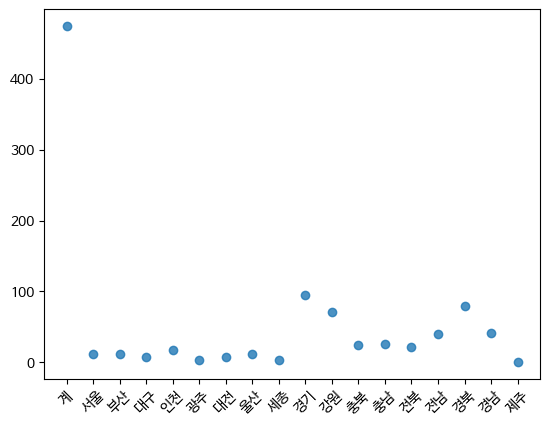

In [455]:
plt.xticks(rotation=45)
sns.regplot(x='시도별', y='건수', data=Fire2)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

UFuncTypeError: ignored

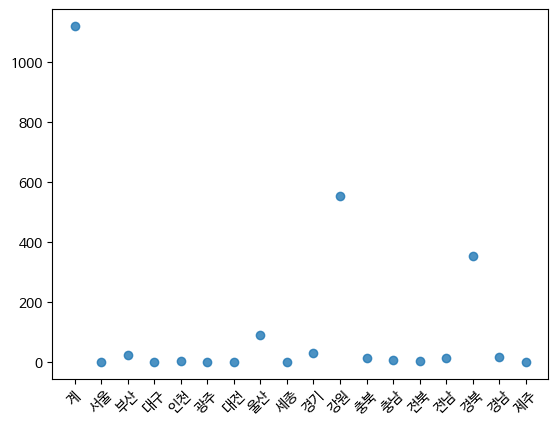

In [456]:
plt.xticks(rotation=45)
sns.regplot(x='시도별', y='면적', data=Fire2)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

UFuncTypeError: ignored

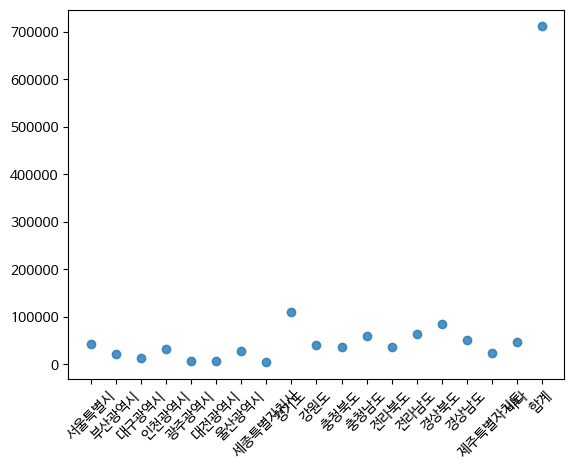

In [457]:

plt.xticks(rotation=45)
sns.regplot(x='행정구역분류', y='CO', data=Air)
plt.title('구별 음식물 쓰레기 배출량과 코로나 발생의 관계')

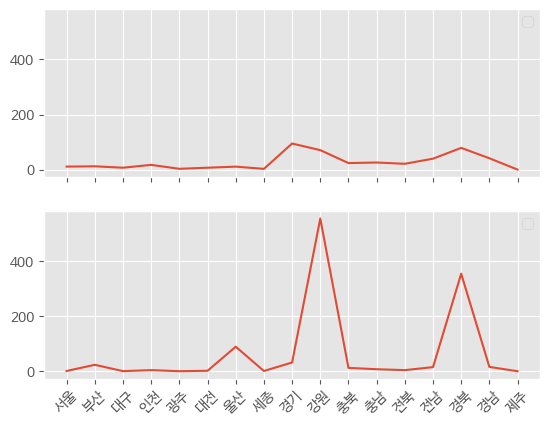

In [500]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
plt.xticks(rotation=45)

plt.subplot(2,1,1)
plt.plot(Fire2['시도별'],Fire2['건수'])
plt.legend()

plt.subplot(2,1,2)
plt.plot(Fire2['시도별'],Fire2['면적'])
plt.legend()

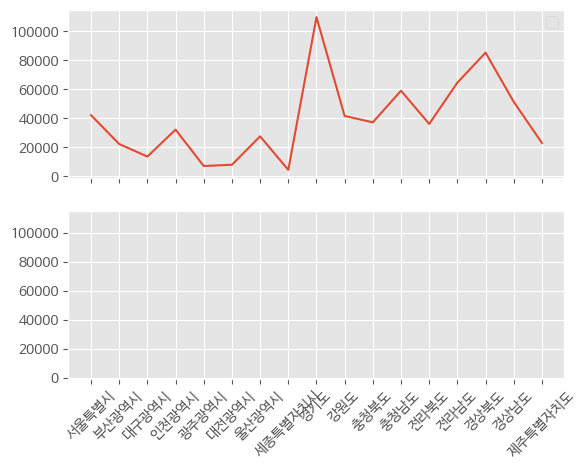

In [507]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
plt.xticks(rotation=45)

plt.subplot(2,1,1)
plt.plot(Air['행정구역분류'], Air['CO'])
plt.legend()

In [518]:
Air = Air.drop([17,18], axis=0)

In [536]:
Fire2 = Fire2.reset_index(drop=True)

In [537]:
Fire2

,시도별,건수,면적,CO
0,서울,11.4,1.33,22210.0
1,부산,12.5,23.76,13535.0
2,대구,7.4,0.75,32136.0
3,인천,17.7,4.41,7040.0
4,광주,3.4,0.50,7899.0
5,대전,7.4,2.08,27507.0
6,울산,11.3,89.35,4357.0
7,세종,3.2,1.25,109728.0
8,경기,95.0,32.13,41561.0
9,강원,71.0,553.70,37163.0


In [519]:
Air.columns = ['시도별', 'CO']
Air

,시도별,CO
0,서울특별시,42125
1,부산광역시,22210
2,대구광역시,13535
3,인천광역시,32136
4,광주광역시,7040
5,대전광역시,7899
6,울산광역시,27507
7,세종특별자치시,4357
8,경기도,109728
9,강원도,41561


In [529]:
Air

,시도별,CO
0,서울특별시,42125
1,부산광역시,22210
2,대구광역시,13535
3,인천광역시,32136
4,광주광역시,7040
5,대전광역시,7899
6,울산광역시,27507
7,세종특별자치시,4357
8,경기도,109728
9,강원도,41561


In [528]:
df['salary'] = 0

In [538]:
Fire3 = Fire2

In [539]:
Fire3

,시도별,건수,면적,CO
0,서울,11.4,1.33,22210.0
1,부산,12.5,23.76,13535.0
2,대구,7.4,0.75,32136.0
3,인천,17.7,4.41,7040.0
4,광주,3.4,0.50,7899.0
5,대전,7.4,2.08,27507.0
6,울산,11.3,89.35,4357.0
7,세종,3.2,1.25,109728.0
8,경기,95.0,32.13,41561.0
9,강원,71.0,553.70,37163.0


In [540]:
Fire3['CO'] = Air['CO']

In [547]:
Fire3

,시도별,건수,면적,CO
0,서울,11.4,1.33,42125
1,부산,12.5,23.76,22210
2,대구,7.4,0.75,13535
3,인천,17.7,4.41,32136
4,광주,3.4,0.50,7040
5,대전,7.4,2.08,7899
6,울산,11.3,89.35,27507
7,세종,3.2,1.25,4357
8,경기,95.0,32.13,109728
9,강원,71.0,553.70,41561


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core

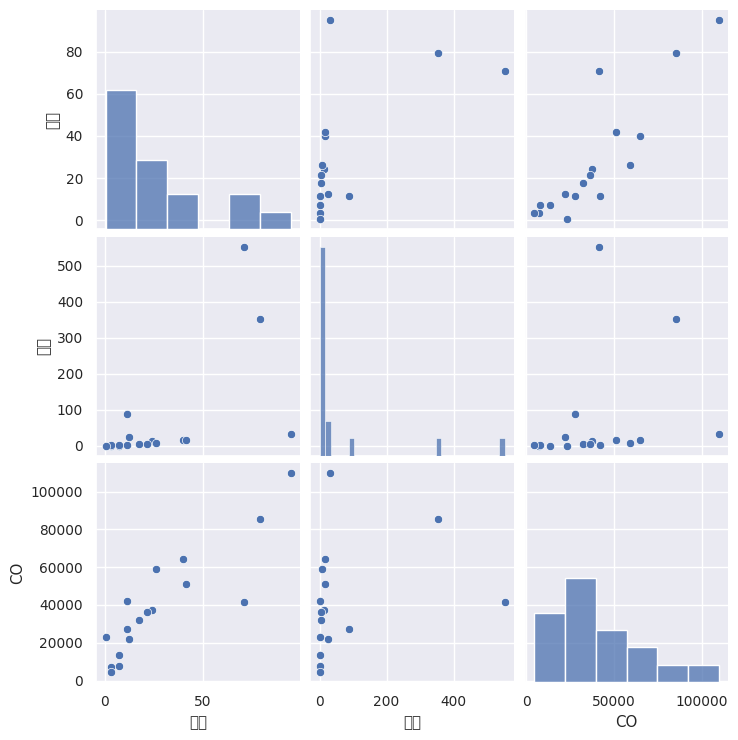

In [561]:
sns.pairplot(Fire3)
plt.show()

In [558]:
sns.set(font_scale=0.9) # 레이블의 폰트 사이즈를 조정

In [560]:
Fire3.corr()

<ipython-input-560-f3baab76e8e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Fire3.corr()


,건수,면적,CO
건수,1.000000,0.612398,0.877298
면적,0.612398,1.000000,0.276387
CO,0.877298,0.276387,1.000000
